# Лабораторная работа № 4
## Сети с радиальными базисными элементами

#### Выполнил: Цапков А.М.

In [2]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.svm import SVC

from neupy.algorithms import PNN, GRNN


from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
step = 0.025
tPoints = np.linspace(0, 2*np.pi, int(2*np.pi/step), endpoint=True)

def split_df(df):
    x_train, x_test = train_test_split(df, test_size=0.3, shuffle=True, random_state=20)
    x_valid, x_test = train_test_split(x_test, test_size=0.3, shuffle=True, random_state=76)
    return x_train, x_valid, x_test

In [4]:
p1 = -0.3
shiftX1 = 0

p2 = -0.4
shiftX2 = 0.4

p3 = -0.5
shiftX3 = 0.65

In [5]:

first = np.random.permutation(tPoints)[:120]
second = np.random.permutation(tPoints)[:120]
third = np.random.permutation(tPoints)[:120]

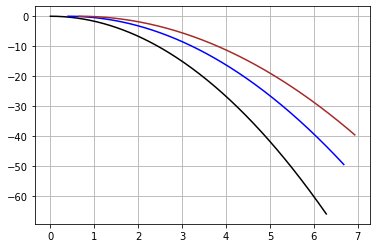

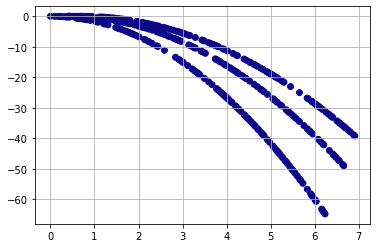

In [6]:

x1 = tPoints + shiftX1
y1 = tPoints * tPoints / (2*p1)

x2 = tPoints + shiftX2
y2 = tPoints * tPoints / (2*p2)

x3 = tPoints + shiftX3
y3 = tPoints * tPoints / (2*p3)

plt.plot(x1, y1, 'black')
plt.plot(x2, y2, 'blue')
plt.plot(x3, y3, 'brown')
plt.grid(True)
plt.show()

x1 = first + shiftX1
y1 = first * first / (2*p1)

x2 = second + shiftX2
y2 = second * second / (2*p2)

x3 = third + shiftX3
y3 = third * third / (2*p3)


df1 = pd.DataFrame({'x' : x1, 'y' : y1, 'target' : 0})
df2 = pd.DataFrame({'x' : x2, 'y' : y2, 'target' : 1})
df3 = pd.DataFrame({'x' : x3, 'y' : y3, 'target' : 2})

for idx, df in enumerate((df1, df2, df3)):
    plt.scatter(df.x, df.y, c= df.target, cmap=plt.cm.plasma)
    plt.grid(True)
plt.show()

In [7]:
train = []
valid = []
test = []

for df in (df1, df2 ,df3):
    tr, v, te = split_df(df)
    train.append(tr)
    valid.append(v)
    test.append(te)
train = pd.concat(train)
valid = pd.concat(valid)
test = pd.concat(test)

In [8]:
print(len(train))
print(len(valid))
print(len(test))

252
75
33


In [9]:
def fit_and_make_scores(model, train, test, valid):
    model.fit(train.iloc[:, :-1], train['target'])

    p = []

    p.append(model.predict(train.iloc[:, :-1]))
    print(accuracy_score(train['target'], p[-1]))

    p.append(model.predict(test.iloc[:, :-1]))
    print(accuracy_score(test['target'], p[-1]))

    p.append(model.predict(valid.iloc[:, :-1]))
    print(accuracy_score(valid['target'], p[-1]))
    
    titles = ['train', 'test', 'valid']

    for idx, df in enumerate((train, test, valid)):
        plt.scatter(df.x, df.y, c=p[idx], cmap=plt.cm.plasma)
        plt.grid(True)
        plt.title(titles[idx])
        plt.show()


In [10]:
def print_map(model):
    hx = 0.05
    hy = 0.5
    grid_pred = [model.predict(np.array([[i, j]])).round(1) for i in np.arange(0, 7+hx, hx) for j in np.arange(-60, 0+hy, hy)]
    x_vals = np.arange(-60, 0+hy, hy)
    y_vals = np.arange(0, 7+hx, hx)

    xx, yy = np.meshgrid(x_vals, y_vals)

    # rows = len(grid_pred)
    # colors = np.array(grid_pred).reshape((rows, 3))
    # colors.shape


    plt.scatter(yy, xx, c=grid_pred, cmap=plt.cm.plasma);
    plt.show()


0.9801587301587301
0.8787878787878788
0.8266666666666667


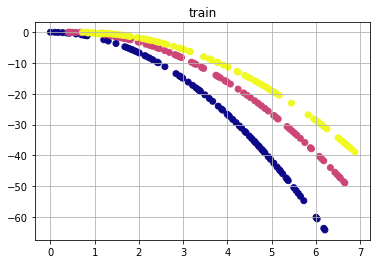

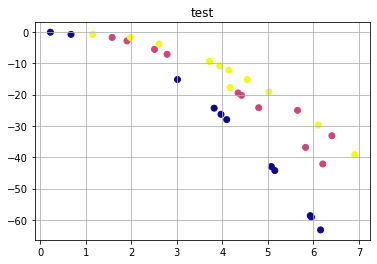

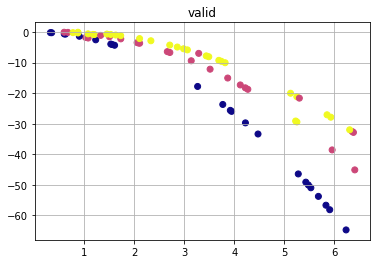

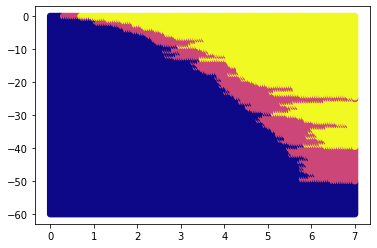

In [11]:
# Задание №1
model = PNN(std=0.3)

fit_and_make_scores(model, train, test, valid)
print_map(model)

1.0
0.9393939393939394
0.9066666666666666


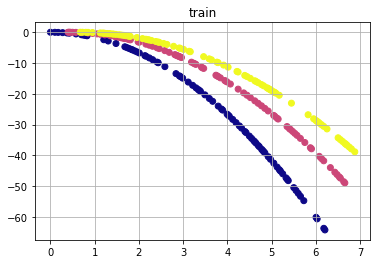

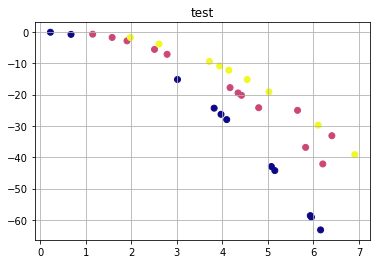

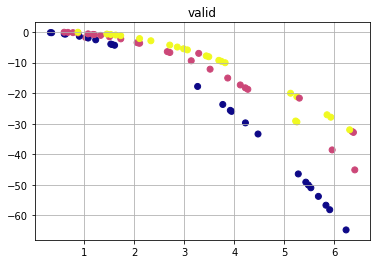

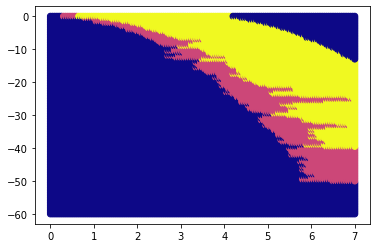

In [12]:
model = PNN(std=0.1)

fit_and_make_scores(model, train, test, valid)
print_map(model)

1.0
1.0
1.0


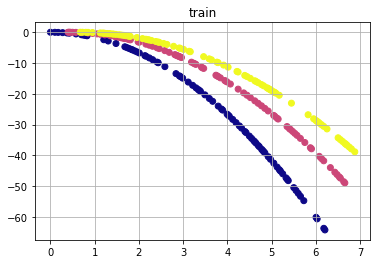

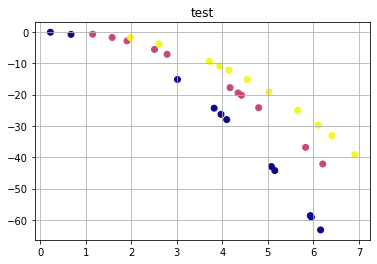

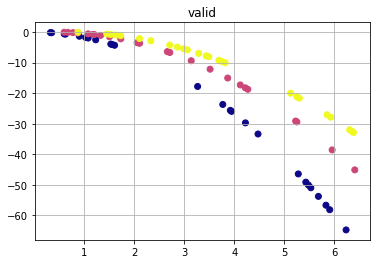

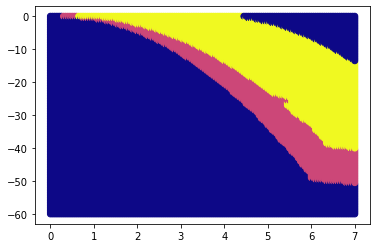

In [13]:
# Задание №2
model = SVC(kernel='rbf', C=1e2, gamma=0.3)
fit_and_make_scores(model, train, test, valid)
print_map(model)

In [14]:
# Задание №3

220


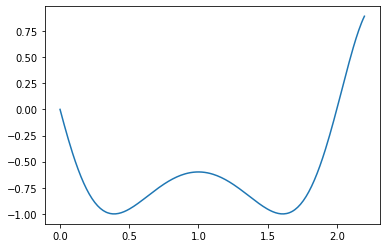

In [15]:
h = 0.01
t = np.linspace(0, 2.2, int(2.2/h), endpoint=True)
x = np.sin( (2.5) * t ** 2 -5*t)
plt.plot(t, x)
print(len(t))

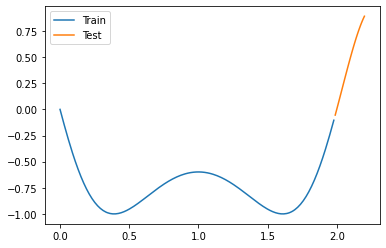

In [16]:
train_size = int(len(t) * 0.9)

X_train = t[:train_size]
y_train = x[:train_size]
plt.plot(X_train, y_train, label='Train')

X_test = t[train_size:]
y_test = x[train_size:]

plt.plot(X_test, y_test, label = 'Test')
plt.legend()
plt.show()

In [17]:
model = GRNN(std=0.09)

In [18]:
model.fit(X_train, y_train)

GRNN(verbose=False, std=0.09)

RMSE on train = 0.04085796640621025 
RMSE on test = 0.712548063127953


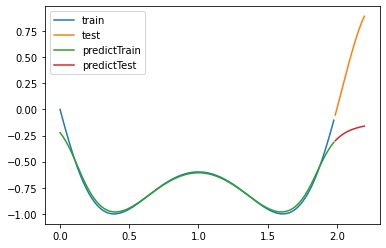

In [22]:
plt.plot(X_train, y_train, label='train')
plt.plot(X_test, y_test, label='test')

pred_x = model.predict(X_train[:])
mse = mean_squared_error(y_train, pred_x.flatten())
plt.plot(X_train, pred_x, label='predictTrain')
print(f'RMSE on train = {np.sqrt(mse)} ')

pred_x = model.predict(X_test[:])
mse = mean_squared_error(y_test, pred_x.flatten())
plt.plot(X_test, pred_x, label='predictTest')
print(f'RMSE on test = {np.sqrt(mse)}')

plt.legend()
plt.show()

# Выводы
Сети с радиально базисными элементами показались мне наиболее интересными, особенно вероятностные и GRNN. Обучение мгновенное, а результат неплохой. Они совсем не подходят для предсказания результата "в будущее" как было в задании лабораторной, но вот для простенькой классификации или регрессии в самый раз.